# Análise exploratória de dados

In [3]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#2E91E5", "#E15F99", "#1CA71C"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Leitura do conjunto de dados

In [5]:
df = pd.read_csv("../data/raw/data.csv")
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. Descrição dos dados

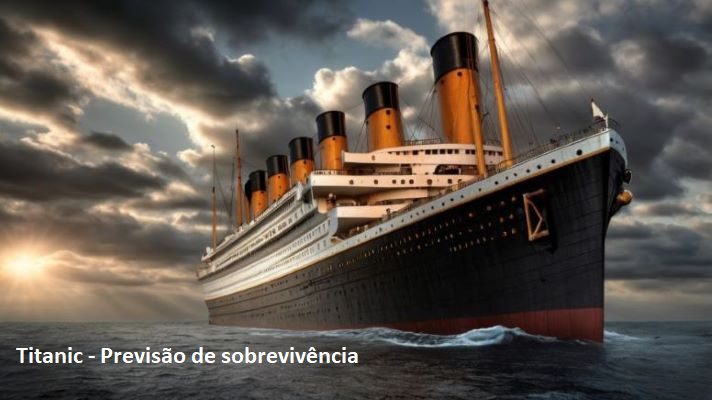

**Titanic - Previsão de sobrevivência** é um conjunto de dados que contém informações sobre os passageiros do Titanic, incluindo se sobreviveram ou não ao naufrágio. As variáveis incluem dados demográficos, classe da passagem, tarifa, entre outros.

## 2.1. Dicionário de dados

In [6]:
dicionario = pd.read_csv('../data/external/dictionary.csv')
dicionario

,variavel,descricao,tipo,subtipo
0,survived,Binário (0 ou 1) - Indica se o passageiro sobr...,qualitativa,nominal
1,pclass,Classe da passagem,qualitativa,ordinal
2,sex,Sexo dos passageiros,qualitativa,nominal
3,age,Idade,quantitativa,continua
4,sibsp,Quantidade de irmãos e cônjuges a bordo,quantitativa,discreta
5,parch,"Quantidade de filhos e enteados, pai ou mãe - ...",quantitativa,discreta
6,fare,Valor da passagem,quantitativa,continua
7,embarked,Portão de embarque,qualitativa,nominal
8,class,Classe da passagem,qualitativa,ordinal
9,who,"Categoriza o passageiro em homem, mulher e cri...",qualitativa,nominal


In [14]:
print(f"Quantidade de instâncias: {df.shape[0]}")
print(f"Quantidade de variáveis: {df.shape[1]}")

Quantidade de instâncias: 891
Quantidade de variáveis: 15


Tipos de variáveis: 2 quantitativas discreta, 2 quantitativas contínuas, 9 qualitativas nominais e 2 qualitativas ordinais.

In [15]:
missing_values = df.isnull().sum()
display(Markdown("### Quantidade de Valores Faltantes"))
display(missing_values)

### Quantidade de Valores Faltantes

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## 3. Perguntas de partida e hipóteses

- Qual foi a taxa de sobrevivência geral dos passageiros do Titanic?

- A idade dos passageiros influenciou suas chances de sobrevivência?

- A taxa de sobrevivência variou significativamente entre diferentes classes de passagem?

- Há uma diferença na taxa de sobrevivência entre homens e mulheres?

-  O número de familiares a bordo (irmãos, cônjuges, pais, filhos) teve impacto na sobrevivência dos passageiros?

- Existe uma diferença significativa na taxa de sobrevivência entre diferentes portos de embarque?

#### Qual foi a taxa de sobrevivência geral dos passageiros do Titanic?

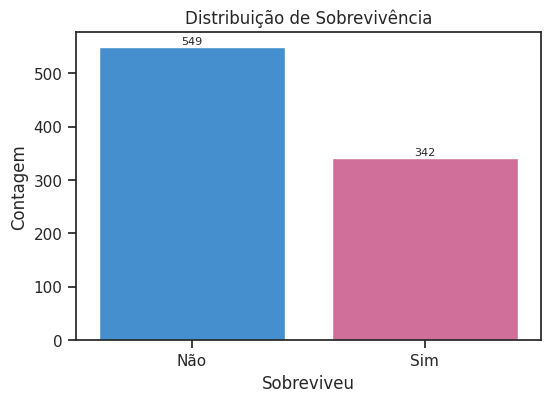

In [52]:
# Taxa de sobrevivência geral
survival_rate = df['survived'].mean()

# Plotando a contagem de sobreviventes vs não sobreviventes
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='survived')
plt.title('Distribuição de Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 4), textcoords='offset points', ha='center', va='center',
                fontsize=8)
plt.show()

In [63]:
print(f"A taxa de sobrevivência geral dos passageiros do Titanic foi de: {survival_rate * 100:.2f}%")

A taxa de sobrevivência geral dos passageiros do Titanic foi de: 38.38%


#### A idade dos passageiros influenciou suas chances de sobrevivência?

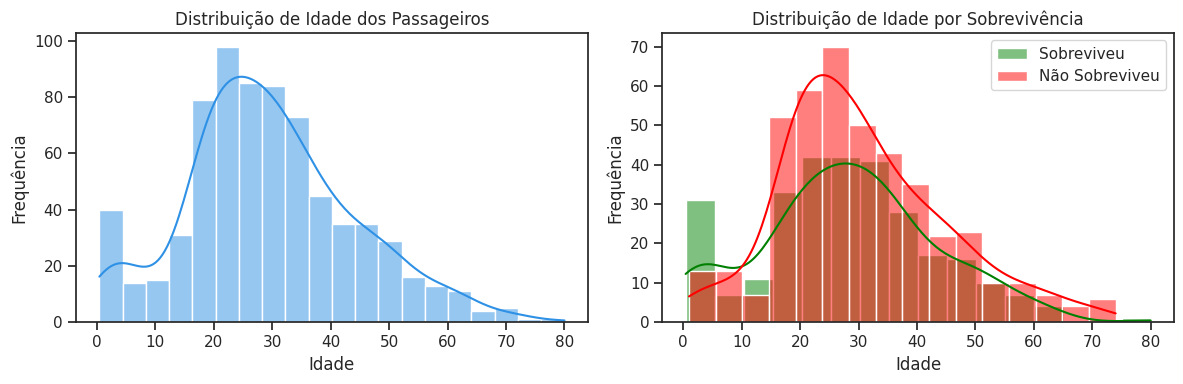

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plotando a distribuição de idade dos passageiros
sns.histplot(df['age'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distribuição de Idade dos Passageiros')
axes[0].set_xlabel('Idade')
axes[0].set_ylabel('Frequência')

# Plotando a taxa de sobrevivência por idade
sns.histplot(df[df['survived'] == 1]['age'].dropna(), kde=True, color='green', label='Sobreviveu', ax=axes[1])
sns.histplot(df[df['survived'] == 0]['age'].dropna(), kde=True, color='red', label='Não Sobreviveu', ax=axes[1])
axes[1].set_title('Distribuição de Idade por Sobrevivência')
axes[1].set_xlabel('Idade')
axes[1].set_ylabel('Frequência')
axes[1].legend()

plt.tight_layout()
plt.show()

- O primeiro gráfico mostra a distribuição de idade de todos os passageiros. A maioria dos passageiros está na faixa etária entre 20 e 40 anos.
- O segundo gráfico apresenta a distribuição de idade separada entre os que sobreviveram (linha verde) e os que não sobreviveram (linha vermelha).
- Com essas observações, a análise sugere que a idade dos passageiros influenciou suas chances de sobrevivência, com uma vantagem de sobrevivência para os passageiros mais jovens.

#### A taxa de sobrevivência variou significativamente entre diferentes classes de passagem?

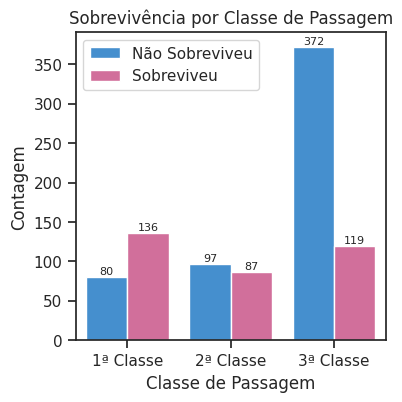

In [69]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=df, x='pclass', hue='survived')
plt.title('Sobrevivência por Classe de Passagem')
plt.xlabel('Classe de Passagem')
plt.ylabel('Contagem')
plt.xticks([0, 1, 2], ['1ª Classe', '2ª Classe', '3ª Classe'])
plt.legend(['Não Sobreviveu', 'Sobreviveu'])

# Adicionar os números nas barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 4), textcoords='offset points', ha='center', va='center',
                fontsize=8)
plt.show()   

- Passageiros de primeira classe têm uma taxa de sobrevivência significativamente maior do que aqueles de segunda e terceira classes.

#### Há uma diferença na taxa de sobrevivência entre homens e mulheres?

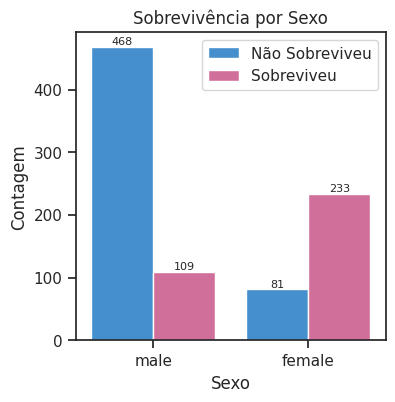

In [68]:
plt.figure(figsize=(4, 4))
ax = sns.countplot(data=df, x='sex', hue='survived')
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 4), textcoords='offset points', ha='center', va='center',
                fontsize=8)
plt.show()

- Há uma diferença clara na taxa de sobrevivência entre homens e mulheres, com mulheres tendo uma taxa de sobrevivência maior.

#### O número de familiares a bordo (irmãos, cônjuges, pais, filhos) teve impacto na sobrevivência dos passageiros?

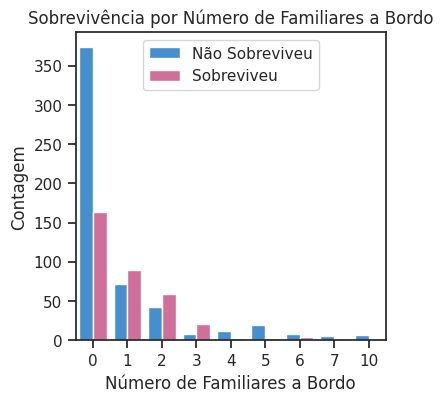

In [67]:
# Criando uma nova variável 'familiares_a_bordo'
df['familiares_a_bordo'] = df['sibsp'] + df['parch']

plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='familiares_a_bordo', hue='survived')
plt.title('Sobrevivência por Número de Familiares a Bordo')
plt.xlabel('Número de Familiares a Bordo')
plt.ylabel('Contagem')
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

- Observa-se que a maioria dos passageiros que não sobreviveram (barras azuis) não tinha familiares a bordo (número de familiares = 0).
- Passageiros com 1 a 3 familiares a bordo apresentam uma proporção maior de sobrevivência em relação aos passageiros que estavam sozinhos.

Com essas observações, a análise sugere que a presença de familiares a bordo pode ter influenciado positivamente as chances de sobrevivência dos passageiros. A priorização de mulheres e crianças também se aplicava a famílias, o que aumentava suas chances de serem resgatados.

#### Existe uma diferença significativa na taxa de sobrevivência entre diferentes portos de embarque?

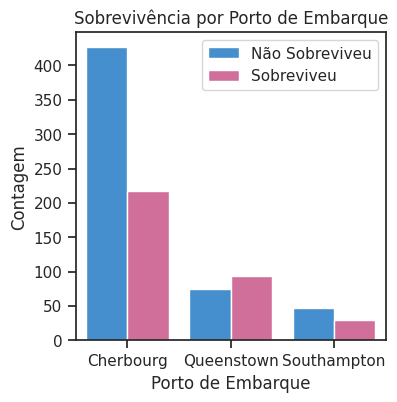

In [66]:
plt.figure(figsize=(4, 4))
sns.countplot(data=df, x='embarked', hue='survived')
plt.title('Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')
plt.xticks([0, 1, 2], ['Cherbourg', 'Queenstown', 'Southampton'])
plt.legend(['Não Sobreviveu', 'Sobreviveu'])
plt.show()

- Com base nesses dados, conseguimos analisar que o porto de embarque teve um impacto significativo na taxa de sobrevivência dos passageiros do Titanic. Passageiros que embarcaram em Cherbourg tinham maiores chances de sobreviver em comparação aos passageiros que embarcaram em Queenstown e Southampton.

## 4. Insights

A análise ajudou a entender os fatores que influenciaram a sobrevivência no naufrágio do Titanic, as informações mais relevantes foram:
- A maioria dos passageiros que sobreviveram eram mulheres e crianças.
- Passageiros de primeira classe tinham uma vantagem significativa na taxa de sobrevivência.
- O número de familiares a bordo impacta positivamente a taxa de sobrevivência dos passageiros, pois mulheres e crianças tinham prioridade.
- A idade é um fator importante na sobrevivência, com uma distribuição diferente entre os que sobreviveram e os que não sobreviveram, com muitos passageiros jovens.
- Passageiros que embarcaram no porto de Southampton têm uma taxa de sobrevivência diferente em comparação com aqueles que embarcaram em Cherbourg ou Queenstown.

## 5. Observação

Não são tiradas conclusões a respeito dos dados e/ou visualizações. Para tal, seria necessário o auxílio de algum especialista no assunto.